In [1]:
import numpy as np

In [2]:
nt = 3
nx = 4
ny = 5
nz = 6
t0, t1 = 0, 1
x0, x1 = 0, 1
y0, y1 = 0, 1
z0, z1 = 0, 1
t = np.linspace(t0, t1, nt)
x = np.linspace(x0, x1, nx)
y = np.linspace(y0, y1, ny)
z = np.linspace(z0, z1, nz)

In [3]:
# 1 dimension
T = np.copy(t)
D = np.copy(T)
print(D)

[0.  0.5 1. ]


In [4]:
# 2 dimension
T = np.repeat(t, nx)
X = np.tile(x, nt)
D = np.vstack([T, X]).T
print(D)

[[0.         0.        ]
 [0.         0.33333333]
 [0.         0.66666667]
 [0.         1.        ]
 [0.5        0.        ]
 [0.5        0.33333333]
 [0.5        0.66666667]
 [0.5        1.        ]
 [1.         0.        ]
 [1.         0.33333333]
 [1.         0.66666667]
 [1.         1.        ]]


In [5]:
# 3 dimension
T = np.repeat(t, nx*ny)
X = np.tile(np.repeat(x, ny), nt)
Y = np.tile(y, nt*nx)
D = np.vstack([T, X, Y]).T
print(D)

[[0.         0.         0.        ]
 [0.         0.         0.25      ]
 [0.         0.         0.5       ]
 [0.         0.         0.75      ]
 [0.         0.         1.        ]
 [0.         0.33333333 0.        ]
 [0.         0.33333333 0.25      ]
 [0.         0.33333333 0.5       ]
 [0.         0.33333333 0.75      ]
 [0.         0.33333333 1.        ]
 [0.         0.66666667 0.        ]
 [0.         0.66666667 0.25      ]
 [0.         0.66666667 0.5       ]
 [0.         0.66666667 0.75      ]
 [0.         0.66666667 1.        ]
 [0.         1.         0.        ]
 [0.         1.         0.25      ]
 [0.         1.         0.5       ]
 [0.         1.         0.75      ]
 [0.         1.         1.        ]
 [0.5        0.         0.        ]
 [0.5        0.         0.25      ]
 [0.5        0.         0.5       ]
 [0.5        0.         0.75      ]
 [0.5        0.         1.        ]
 [0.5        0.33333333 0.        ]
 [0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.5 

In [6]:
# 4 dimension
T = np.repeat(t, nx*ny*nz)
X = np.tile(np.repeat(x, ny*nz), nt)
Y = np.tile(np.repeat(y, nz), nt*nx)
Z = np.tile(z, nt*nx*ny)
D = np.vstack([T, X, Y, Z]).T
print(D)

[[0.  0.  0.  0. ]
 [0.  0.  0.  0.2]
 [0.  0.  0.  0.4]
 ...
 [1.  1.  1.  0.6]
 [1.  1.  1.  0.8]
 [1.  1.  1.  1. ]]


In [7]:
n_train = np.prod([nt, nx, ny, nz])
print(n_train)

360


In [8]:
len(D)

360

In [9]:
n = [3, 4, 5, 6]
b = [
    [0, 1],
    [0, 1],
    [0, 1],
    [0, 1],
]
n_dim = len(n)
n_train = np.prod(n)
print(n_dim, n_train)

4 360


In [10]:
x = []
for i in range(n_dim):
    x.append(np.linspace(b[i][0], b[i][1], n[i]))

In [11]:
grid = []
# grid.append(np.repeat(x[0], np.prod(n[1:])))
# for i in range(0, n_dim - 1):
for i in range(n_dim):
    grid.append(
      np.tile(
        np.repeat(x[i], np.prod(n[i + 1:])),
        np.prod(n[:i])
      )
    )
# grid.append(np.tile(x[-1], np.prod(n[:-1])))
D2 = np.vstack(grid).T

In [12]:
D.shape, D2.shape

((360, 4), (360, 4))

In [13]:
for p in D == D2:
    for v in p:
        if not v:
            print("FAIL")

In [14]:
D[179]

array([0.5       , 0.33333333, 1.        , 1.        ])

In [19]:
def create_training_points_random(nr: np.ndarray, br: np.ndarray):
    """Create randomly-spaced training points.

    Create a set of training points randomly spaced in n orthogonal dimensions.
    Flatten the data to a list of of n-dimensional points.

    Parameters
    ----------
    nr : np.ndarray of int, shape (n_dim,)
        Number of randomly-spaceed points along each dimension.
    br : np.ndarray of float, shape (n_dim, 2)
        Minimum and maximum (boundary) values for each dimension.

    Returns
    -------
    Xr : np.ndarray, shape (np.prod(ng), n_dim)
        Array of all training points.
    """
    # Determine the number of dimensions.
    n_dim = len(nr)

    # Compute the total number of points to create.
    Nr = np.prod(nr)

    # Create Nr random points, each with n_dim coordinates.
    # These points are from the uniform random half-open interval [0, 1).]
    # Then map these random points to the corresponding ranges defined in br.
    Xr = np.random.random(size=(Nr, n_dim))*(br[:, 1] - br[:, 0]) + br[:, 0]

    # Return the training points.
    return Xr


In [20]:
nr = np.array([50, 100])
br = np.array([[0, 1], [2.5, 4]])

In [21]:
Xr = create_training_points_random(nr, br)

In [22]:
import matplotlib.pyplot as plt

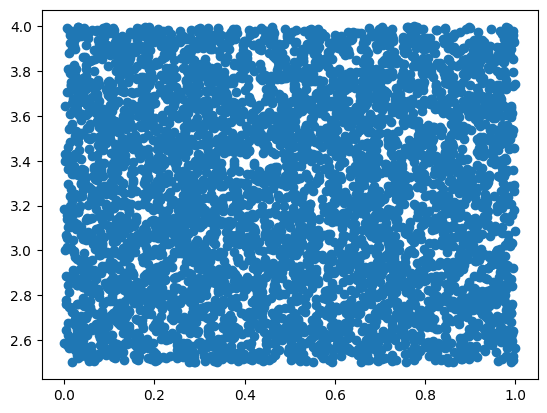

In [23]:
plt.scatter(Xr[:, 0], Xr[:, 1])

In [24]:
X = np.loadtxt("points.dat")

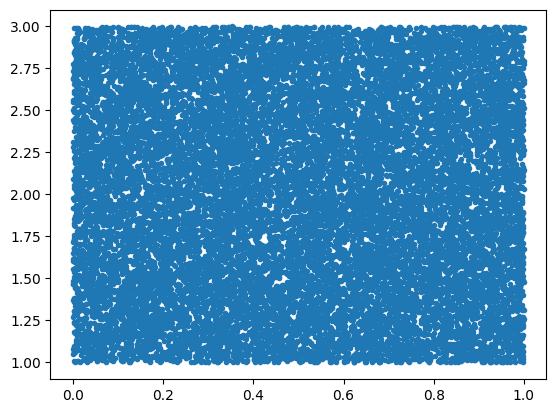

In [28]:
plt.scatter(X[:, 0], X[:, 1], marker=".")